In [1]:
import numpy as np 
import pandas as pd

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [2]:
data=pd.read_csv(r"C:\Users\sunny\Downloads\fcc-forum-pageviews.csv")
data.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [3]:
# Calculate the 2.5th and 97.5th percentiles
lower_bound = data['value'].quantile(0.025)
upper_bound = data['value'].quantile(0.975)

# Filter the data
data_cleaned = data[(
    data['value'] >= lower_bound) & (data['value'] <= upper_bound)]

# Display the first few rows of the cleaned DataFrame to verify
print(data_cleaned.head())


          date  value
10  2016-05-19  19736
17  2016-05-26  18060
18  2016-05-27  19997
19  2016-05-28  19044
20  2016-05-29  20325


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

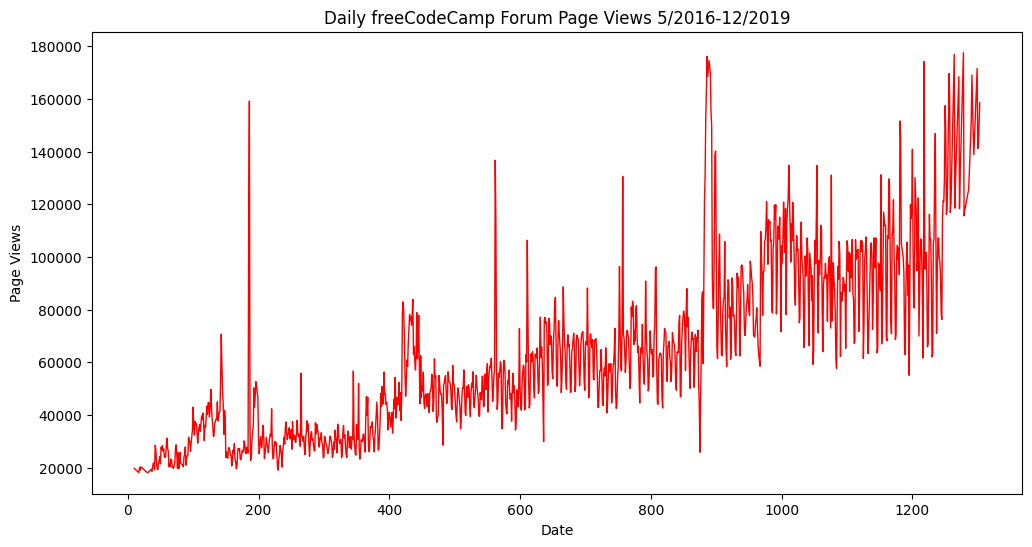

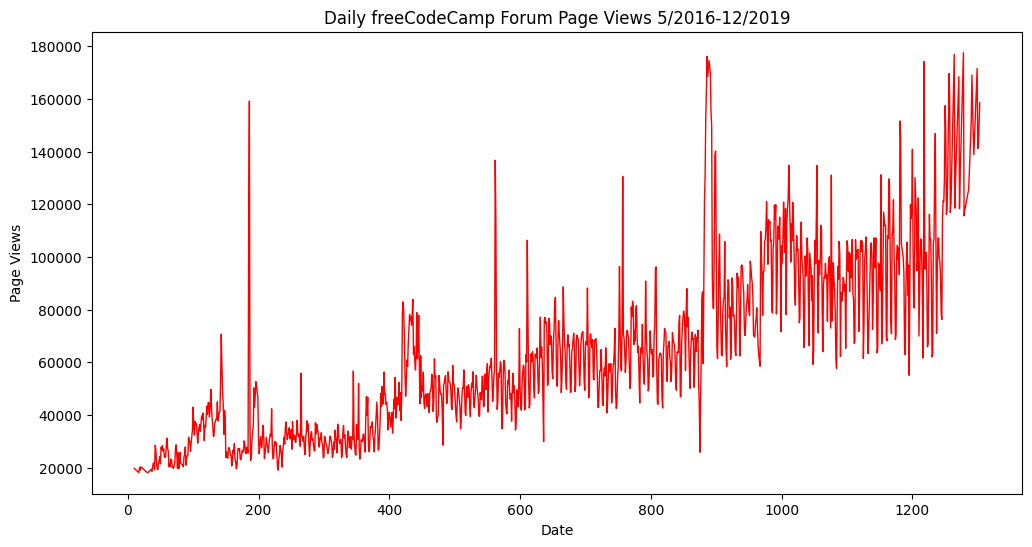

In [8]:
import matplotlib.pyplot as plt

def draw_line_plot():
    # Create the line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(data_cleaned.index, data_cleaned['value'], color='red', linewidth=1)

    # Set the title and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save the plot
    fig.savefig('line_plot.png')

    # Return the figure
    return fig

# Call the function to test it
draw_line_plot()


Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views

C:\Users\sunny\AppData\Local\Temp\ipykernel_1756\1823635065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned.index.year
C:\Users\sunny\AppData\Local\Temp\ipykernel_1756\1823635065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned.index.strftime('%B')


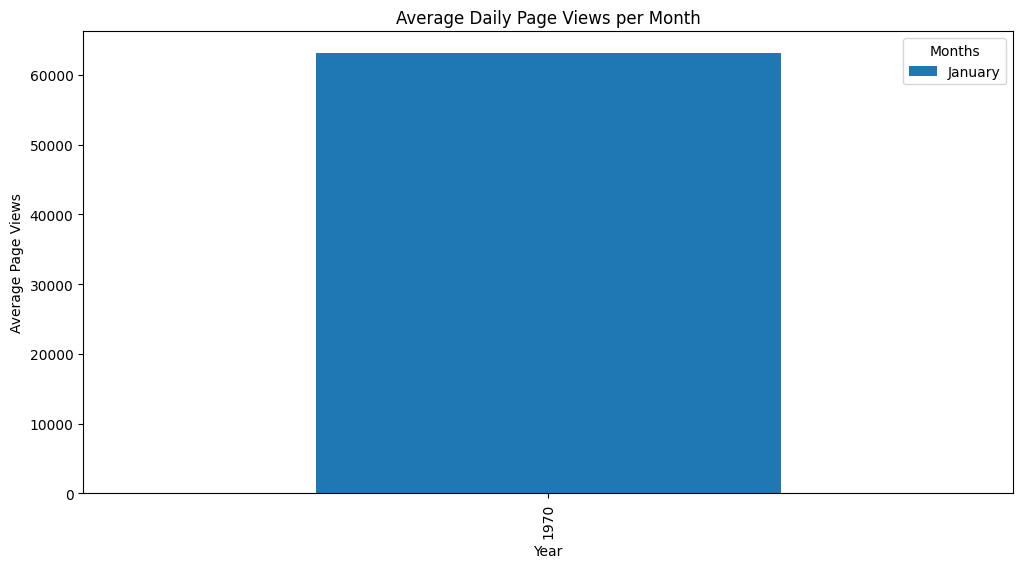

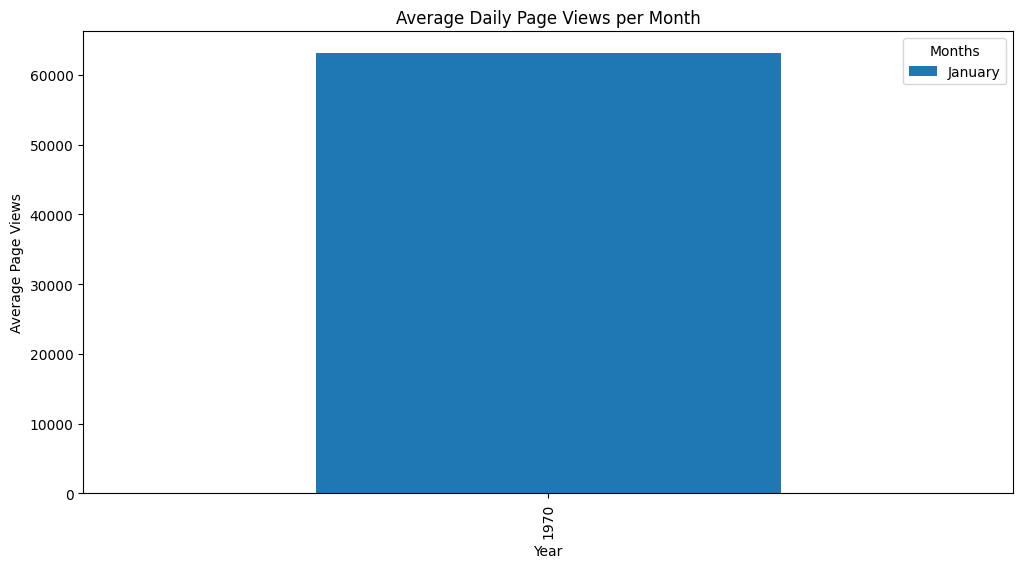

In [12]:

import seaborn as sns

def draw_bar_plot():
 
    # Ensure the index is a DateTime object
    data_cleaned.index = pd.to_datetime(data_cleaned.index)

    # Prepare the data for the bar plot
    data_cleaned['year'] = data_cleaned.index.year
    data_cleaned['month'] = data_cleaned.index.strftime('%B')
    data_bar = data_cleaned.groupby(['year', 'month'])['value'].mean().unstack()

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    data_bar.plot(kind='bar', ax=ax)
    ax.set_title('Average Daily Page Views per Month')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    # Save the plot
    fig.savefig('bar_plot.png')

    # Return the figure
    return fig

# Call the function to test it
draw_bar_plot()


Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

C:\Users\sunny\AppData\Local\Temp\ipykernel_1756\2369219265.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned.index.year
C:\Users\sunny\AppData\Local\Temp\ipykernel_1756\2369219265.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned.index.strftime('%b')
C:\Users\sunny\AppData\Local\Temp\ipykernel_1756\2369219265.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

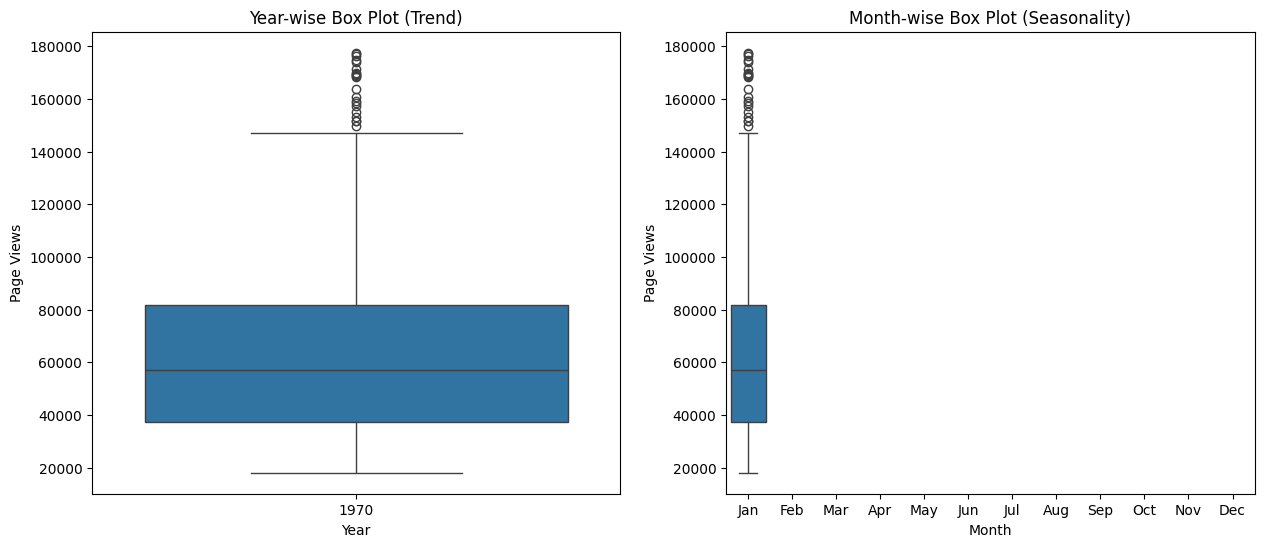

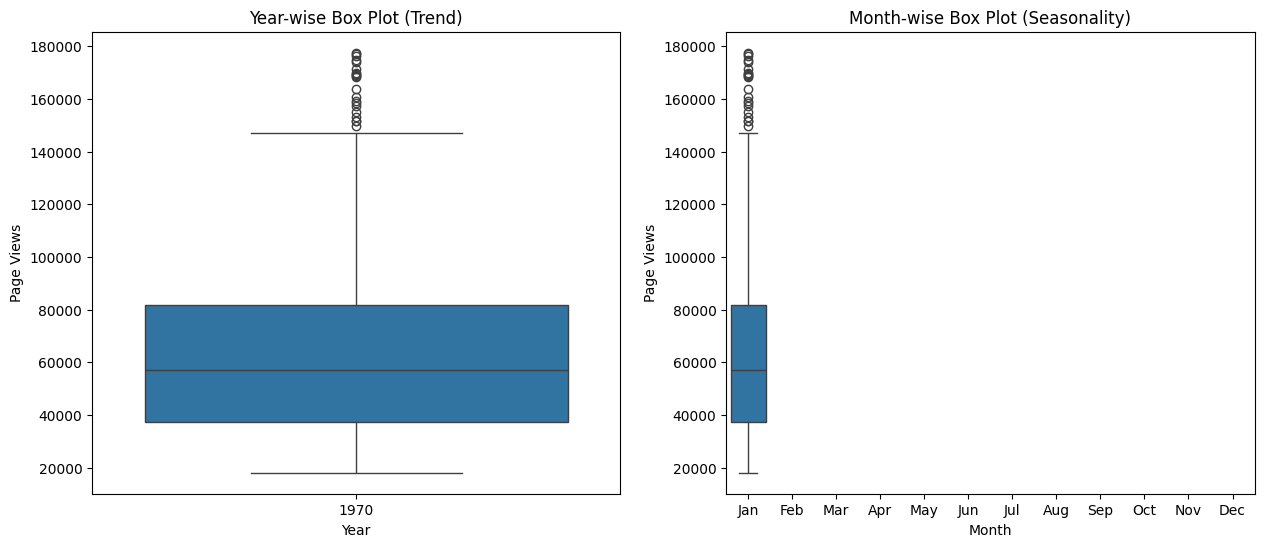

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def draw_box_plot():

    # Clean the data
    lower_bound = data['value'].quantile(0.025)
    upper_bound = data['value'].quantile(0.975)
    data_cleaned = data[(data['value'] >= lower_bound) & (data['value'] <= upper_bound)]

    # Prepare the data for box plots
    data_cleaned.index = pd.to_datetime(data_cleaned.index)
    data_cleaned['year'] = data_cleaned.index.year
    data_cleaned['month'] = data_cleaned.index.strftime('%b')
    data_cleaned['month_num'] = data_cleaned.index.month
    data_cleaned = data_cleaned.sort_values('month_num')

    # Create the box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=data_cleaned, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=data_cleaned, ax=axes[1], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save the plot
    fig.savefig('box_plot.png')

    # Return the figure
    return fig

# Call the function to test it
draw_box_plot()
